![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Software Development with Python

# Using a debugger to identify code problems

Software bugs can be difficult to identify, and using a debugger is often useful in helping in this process.

In this project, you will be work with a version of the Fractal software library this course uses throughout to demonstrate various Python software development tools.  This same library is used for other purposes in other INE courses.  The version of the library you will need for these exercises is at:

> https://github.com/ine-rmotr-projects/INE-Fractal/tree/softwaredev

Other branches of that repository will contain somewhat different versions of the library, and many projects in this course will not make sense in relation to them.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Part 1

**Debug `polymandel()`**

A fractal function called `polymandel()` has been added to the branch used for these projects.  The general idea of this new iterative function is that whereas the Mandelbrot set is based around the function:

$$z = z^2 + z0$$

A so-called "PolyMandel" fractal is based around a more general polynomial (of up to degree 6):

$$z = a_6z^6 + a_5z^5 + a_4z^4 + \dots + z0$$

In particular, these two commands should generate the same image:

```bash
$ ./create-fractal.py -t mandelbrot
$ ./create-fractal.py -t polymandel -k "p2=1"
```

Because of a bug in the implementation in the repository, they differ in a manner you can visually examine.

You might, of course, be able to fix the problem simply by reading the source code of files in the library.  But for this project, use a debugger to actually step through the execution of the commands shown, and figure out where something goes amiss.

As another example for comparison, the file `polymandel_0_0_2_p4=1,p3=0.5,p2=-1.png` should look like the below.  The naming of these files is probably obvious; if not you can figure it out from the source code.

<img src="polymandel_0_0_2_p4=1,p3=0.5,p2=-1.png" width="500"/>

**A possible solution**

Exactly what you will examine might vary.  The essential difference between `mandelbrot()` and `polymandel()` is the the former explicitly returns `orbits` if no smaller value is returned earlier within the loop.  In contrast, `polymandel()` simply "falls off the end", i.e. it returns `None`.  Elsewhere `make_canvas()` defaults those `None`s to 0, rather than to 255 or some other "large" number.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Part 2

**Debug `utility.exchange.same_image()`**

The videos in this course do not discuss it, but an extra capability in the library is to create "archives" of fractals, perhaps ones you find notable to share or study further.  The submodule `utility.exchange` contains several capabilities around this.  Unfortunately, it also contains a bug that you should identify and fix using a debugger.

As in Part 1, of course it is *possible* you might determine the problem simply by eyeballing the code, but your task to utilize a debugger to help you find it.

In [1]:
import sys
# Substitute appropriate path for your repo clone
sys.path.append('/home/dmertz/git/INE-Fractal')

In [2]:
from fractal.julia import fast_julia
from fractal.visualize import visualize, make_canvas
from utility.exchange import read_archive, write_archive, make_archive, same_image

We can create a fractal and display it.

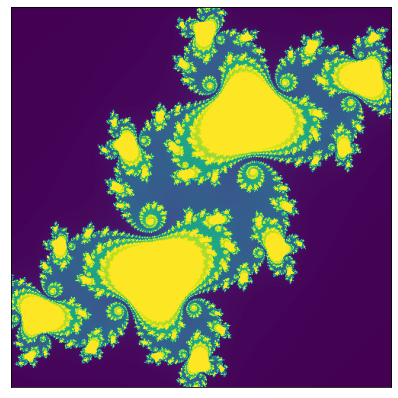

In [3]:
j = make_canvas(fast_julia, 0, 0, 2, pixels=500)
visualize(j)

An archive incorporates some metadata associated with a particular fractal.

In [4]:
a1 = make_archive(j, "Julia, standard width 2")
print(a1)

Description: Julia, standard width 2
Timestamp:   2021-02-01T01:34:53.241329
UUID:        116842c5-5c45-4c0c-86ea-b55e97df09bd
Size:        (500, 500)
Fingerprint: 96c10e1965861f96ff3672a9652a8bc3d5ce8f05


In [5]:
a2 = make_archive(j, "Julia, centered at 0+0j")
print(a2)

Description: Julia, centered at 0+0j
Timestamp:   2021-02-01T01:34:53.252565
UUID:        c174f3c0-d17c-47a3-8599-ff8162acfed2
Size:        (500, 500)
Fingerprint: 96c10e1965861f96ff3672a9652a8bc3d5ce8f05


In [6]:
same_image(a1, a2)

True

We can also save and restore archives to disk:

In [7]:
write_archive(j, 'MyJulia', comment="Julia, saved for reference")
write_archive(j, 'MyOtherJulia', comment="Different filename")

Julia, saved for reference


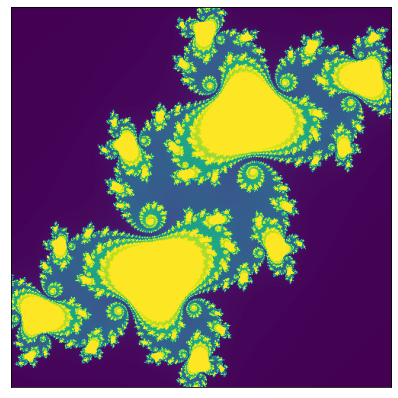

In [8]:
a3 = read_archive('MyJulia')
a4 = read_archive('MyOtherJulia')
print(a3.description)
visualize(a3.canvas)

So far, so good.  But why does the following not work correctly? Why especially, do `a1` and `a3` claim to be different, but `a3` and `a4` claim to be the same?!

In [9]:
same_image(a1, a3)

False

In [10]:
same_image(a3, a4)

True

**A possible solution**

As in most bugs, the error in the code is shockingly small.  `same_image()` looks for whether **both** archives have a `.hash_` attribute, not whether either does, in the decision whether to fall back to comparing the entire arrays.  However, this error would also not occur if `write_archive()` utilized the `.hash_` attribute.  One might decide the bug is in either place—or both—but the logic error needs to be noticed when debugging.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)